# 📉 Scikit-learn Model Evaluation

In this tutorial, we'll cover different evaluation metrics commonly used to assess the performance of machine learning models. Understanding these metrics is crucial for selecting the right model and fine-tuning its parameters.

We'll cover the following evaluation metrics:

1. Accuracy
2. Precision, Recall (Sensitivity), and Specificity
3. F1 Score
4. Confusion Matrix
5. ROC Curve and AUC-ROC

Let's get started!

## 1. Load Data

In [17]:
import numpy as np

# Mocking y_true and y_pred for demonstration
np.random.seed(42)
y_true = np.random.randint(0, 2, size=100)  # Binary labels (0 or 1)
y_pred = np.random.rand(100)  # Random predicted probabilities between 0 and 1

# Converting probabilities to binary predictions
y_pred = (y_pred >= 0.5).astype(int)

## 2. Model Evaluation Metrics

Imagine a **box** filled with **balls**: some are **blue**, and others are **not-blue**. Your task is to identify all the blue balls without mistakenly picking the not-blue ones. Here's how various metrics would help you assess your performance:

![balls_metrics](https://github.com/Matesanz/python-machine-learning-course/blob/main/docs/assets/metrics/metrics_00.jpg?raw=True)

### 2.1 Confusion Matrix

The confusion matrix is a table that **describes the performance of a classification model**. It shows the counts of

* **True Positive (TP):** The number of times the item was correctly identified as blue. In other words, it truly is blue, and the model/test also predicted it as blue.

* **False Positive (FP):** The number of times the item was incorrectly identified as blue. This means the item is not actually blue, but the model/test mistakenly predicted it as blue.

* **True Negative (TN):** The number of times the item was correctly identified as not being blue. So, it truly isn't blue, and the model/test correctly predicted it as not blue.

* **False Negative (FN):** The number of times the item was incorrectly identified as not blue. This means the item is actually blue, but the model/test failed to recognize it and predicted it as not blue.

![balls_metrics](https://github.com/Matesanz/python-machine-learning-course/blob/main/docs/assets/metrics/metrics_01.jpg?raw=True)


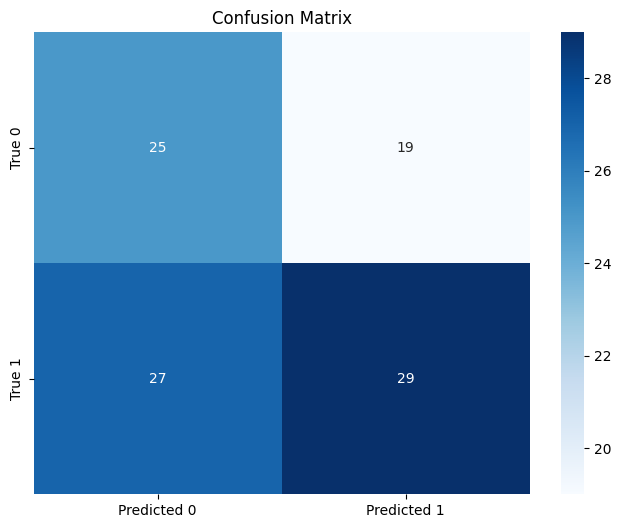

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix')
plt.show()

### 2.2 Accuracy

Accuracy is the most straightforward metric and represents **the percentage of correct predictions out of the total** predictions made by the model. Suppose out of 5 attempts, you correctly identify the color 4 times (whether it's blue or not-blue), then your accuracy is 80%. **It's about how often you're right in general.**

![accuracy](https://github.com/Matesanz/python-machine-learning-course/blob/main/docs/assets/metrics/metrics_02.jpg?raw=True)


In [19]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.54


### 2.3 Precision

Precision is proportion of **true positive predictions out of all positive predictions** made by the model. It measures the model's ability to avoid false positives Let's say when you guess a ball is blue, you want to be sure it really is blue. If you pick 3 balls thinking they're blue and only 2 of them are actually blue, your precision is 2/3 or about 67%. **It tells how often you're right when you claim a ball is blue.**

![precision](https://github.com/Matesanz/python-machine-learning-course/blob/main/docs/assets/metrics/metrics_03.jpg?raw=True)

In [20]:
from sklearn.metrics import precision_score


precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")

Precision: 0.60


### 2.4 Recall (Sensitivity)

The proportion of **true positive predictions out of all actual positive samples** in the dataset. It measures the model's ability to find all positive samples. Now, think of the blue balls as "important items" you don’t want to overlook. If there are 3 blue balls in the box and you only identify 2 as blue, then your recall is 2/3 or about 70%. **This metric shows how many of the actual blue balls you successfully spotted.**

![recall](https://github.com/Matesanz/python-machine-learning-course/blob/main/docs/assets/metrics/metrics_04.jpg?raw=True)

In [21]:
from sklearn.metrics import recall_score


recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.52


### 2.5 **Specificity**

The proportion of **true negative predictions out of all actual negative samples** in the dataset. It measures the model's ability to find all negative samples. Shifting focus to the not-blue balls: If there are 2 not-blue balls and you correctly identified 1 of them when searching for blue ones, your specificity is 50%. **It highlights how good you are at ignoring the not-blue distractions.**

![Specificity](https://github.com/Matesanz/python-machine-learning-course/blob/main/docs/assets/metrics/metrics_05.jpg?raw=True?raw=True)

In [22]:
# we use the values of the confusion matrix
specificity = tn / (tn + fp)
print(f"Specifity: {specificity:.2f}")

Specifity: 0.57


### 2.6 F1 Score

The F1 score is the **harmonic mean of precision** (a ball is truly blue when you pick it) and **recall** (not missing any blue balls), providing a balanced measure between the two. It is useful when you need to consider both false positives and false negatives.

![f1_score](https://github.com/Matesanz/python-machine-learning-course/blob/main/docs/assets/metrics/metrics_06.jpg?raw=True)

In [23]:
from sklearn.metrics import f1_score

# Calculate the F1 score of the model
f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.56


### 2.7 ROC Curve and AUC

Imagine the model has a "dial" you can adjust. If you turn the dial up (increasing sensitivity), the model becomes more aggressive in predicting that balls are blue. Turn it down, and the model becomes more cautious, predicting fewer balls as blue.

**Trade-offs**

But there's a catch! As you become **more aggressive** in predicting blue balls (higher sensitivity), you'll likely **pick up more actual blue balls** (true positives), but you'll also probably **pick up more not-blue balls by mistake** (false positives). Conversely, being **more cautious** (lower sensitivity) means you'll probably **miss out** on identifying some **blue balls** (false negatives), but you'll also have **fewer mistaken identifications of not-blue balls**.

![threshold](https://github.com/Matesanz/python-machine-learning-course/blob/main/docs/assets/metrics/metrics_07.jpg?raw=True)

**This is where the ROC curve comes in**. It visually **represents the trade-offs between the true positive rate** (how many actual blue balls you correctly identify) **and the false positive rate** (how many not-blue balls you mistakenly identify as blue) at various threshold settings.

- On the ROC curve:
  - The **x-axis** represents the **False Positive Rate (FPR)**: the proportion of not-blue balls wrongly identified as blue.
  - The **y-axis** represents the **True Positive Rate (TPR)**: the proportion of actual blue balls correctly identified.
  - A point on the curve represents a specific sensitivity setting. As you move from the bottom left to the top right of the curve, sensitivity increases.

**Interpreting the Curve**

- A tool that guesses randomly would produce a straight diagonal line from the bottom left to the top right (known as the line of no-discrimination). It's the worst-case scenario.
  
- A perfect tool would have a curve that goes straight up the y-axis and then straight across the top. This means it identifies all blue balls without any mistakes.

- A real-world tool will usually have a curve somewhere in between these two extremes. The further the curve is from the diagonal line (and the closer it is to the top-left corner), the better the tool is overall.

**The Area Under the Curve (AUC)**

The Area Under the ROC Curve (AUC-ROC) is a **single scalar value** that represents the area under the ROC curve. It provides a measure of the** model's ability to distinguish between classes**.

![auc](https://github.com/Matesanz/python-machine-learning-course/blob/main/docs/assets/metrics/metrics_08.jpg?raw=True)

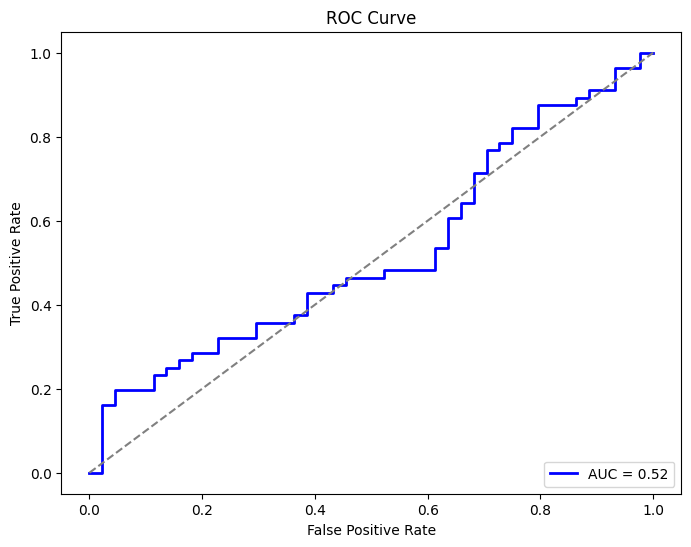

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

# Mock some probability scores for y_pred (just for demonstration purposes)
y_probs = np.random.rand(100)

fpr, tpr, thresholds = roc_curve(y_true, y_probs)
auc_roc = roc_auc_score(y_true, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {auc_roc:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

By examining the ROC curve, you can understand the trade-offs between being too aggressive (many false positives) or too cautious (many false negatives) in your predictions. You can also compare different tools or models by seeing which one has a curve closer to that top-left "ideal" corner. The goal is to choose a balance that is best suited to the task at hand, using the ROC curve as a guide.

**Conclusion**

These are some of the essential evaluation metrics used to assess the performance of machine learning models. Depending on the specific problem and business requirements, you may need to prioritize different metrics.

Always keep in mind that a single metric may not be sufficient to evaluate the model's performance comprehensively. It's often necessary to consider multiple metrics and the context of the problem to draw meaningful conclusions about the model's effectiveness.

Continue practicing with different datasets and models to gain a better understanding of model evaluation. Happy learning!